# Análise dos dados de uma tabela #

## Este código é um exemplo de análise de dados de uma tabela, referente ao Projeto Integrador ##




In [1]:
#Importando a biblioteca necessária
import pandas as pd

In [2]:
#Lendo a tabela
ler = pd.read_excel('STG_FNT_ITT.xlsx')

In [3]:
#Exibindo alguns dados dela
ler.head(10)

,ID_STG_FNT_ITT,NUM_CNPJ,NUM_CMP_CNPJ,NOM_COM,NOM_RAZ_SCL,DAT_INC_DBO
0,137,2427884087,2805,NMN,NMN,2019-12-19 13:43:41.914
1,183,12182674487,2635,NMN,NMN,2019-12-19 13:43:41.914
2,197,16167328168,1802,NMN,NMN,2019-12-19 13:43:41.914
3,267,279925978,2329,NMN,NMN,2019-12-19 13:43:41.914
4,322,20579036860,2397,NMN,NMN,2019-12-19 13:43:41.914
5,336,6574465046,2465,NMN,NMN,2019-12-19 13:43:41.914
6,343,306428723,2380,NMN,NMN,2019-12-19 13:43:41.914
7,356,7422524275,2550,NMN,NMN,2019-12-19 13:43:41.914
8,380,707714471,1904,NMN,NMN,2019-12-19 13:43:41.914
9,394,582504932,3094,NMN,NMN,2019-12-19 13:43:41.914


In [4]:
#Verificando se tem ID's duplicados
ler['ID_STG_FNT_ITT'].duplicated().sum()

0

In [5]:
#Verificando os tipos de dados dentro da tabela
ler.dtypes

ID_STG_FNT_ITT     int64
NUM_CNPJ           int64
NUM_CMP_CNPJ       int64
NOM_COM           object
NOM_RAZ_SCL       object
DAT_INC_DBO       object
dtype: object

In [6]:
#Convertendo os dados "int64" para "object" para trabalhar melhor
ler['NUM_CNPJ'] = ler.NUM_CNPJ.astype('str')
ler['NUM_CMP_CNPJ'] = ler.NUM_CMP_CNPJ.astype('str')
ler.dtypes

ID_STG_FNT_ITT     int64
NUM_CNPJ          object
NUM_CMP_CNPJ      object
NOM_COM           object
NOM_RAZ_SCL       object
DAT_INC_DBO       object
dtype: object

In [7]:
#Verificando os CNPJs e complementos inválidos e colocando em uma tabela
cnpj_erro = ler.loc[(ler['NUM_CNPJ'].str.len() > 10) | (ler['NUM_CMP_CNPJ'].str.len()!=4) |
                   (ler['NUM_CNPJ'] == '0')]

In [11]:
#Exibindo alguns CNPJ's inválidos
cnpj_erro.head(10)

,ID_STG_FNT_ITT,NUM_CNPJ,NUM_CMP_CNPJ,NOM_COM,NOM_RAZ_SCL,DAT_INC_DBO
1,183,12182674487,2635,NMN,NMN,2019-12-19 13:43:41.914
2,197,16167328168,1802,NMN,NMN,2019-12-19 13:43:41.914
4,322,20579036860,2397,NMN,NMN,2019-12-19 13:43:41.914
12,458,20616228848,1972,NMN,NMN,2019-12-19 13:43:41.914
14,491,20041241384,1870,NMN,NMN,2019-12-19 13:43:41.914
24,595,12886037774,1819,NMN,NMN,2019-12-19 13:43:41.914
31,709,17230384612,3366,NMN,NMN,2019-12-19 13:43:41.914
36,778,15370302582,2261,NMN,NMN,2019-12-19 13:43:41.914
37,790,17949664574,1751,NMN,NMN,2019-12-19 13:43:41.914
38,815,25372939671,3383,NMN,NMN,2019-12-19 13:43:41.914


In [12]:
#Verificando os CNPJs e complementos válidos e colocando em uma tabela
##Números de CNPJ's menores que dez, serão completados com zeros à esquerda
cnpj_certo = ler.loc[(ler['NUM_CNPJ'].str.len()<= 10 ) & (ler['NUM_CMP_CNPJ'].str.len()==4) &
                    (ler['NUM_CNPJ'] != '0')]

In [13]:
#Exibindo alguns CNPJ's válidos
cnpj_certo.head(10)

,ID_STG_FNT_ITT,NUM_CNPJ,NUM_CMP_CNPJ,NOM_COM,NOM_RAZ_SCL,DAT_INC_DBO
0,137,2427884087,2805,NMN,NMN,2019-12-19 13:43:41.914
3,267,279925978,2329,NMN,NMN,2019-12-19 13:43:41.914
5,336,6574465046,2465,NMN,NMN,2019-12-19 13:43:41.914
6,343,306428723,2380,NMN,NMN,2019-12-19 13:43:41.914
7,356,7422524275,2550,NMN,NMN,2019-12-19 13:43:41.914
8,380,707714471,1904,NMN,NMN,2019-12-19 13:43:41.914
9,394,582504932,3094,NMN,NMN,2019-12-19 13:43:41.914
10,395,619875811,2397,NMN,NMN,2019-12-19 13:43:41.914
11,422,200819453,2040,NMN,NMN,2019-12-19 13:43:41.914
13,481,9804044092,2958,NMN,NMN,2019-12-19 13:43:41.914


In [14]:
#Verificando se o Nome Comercial e o Nome da Razão Social não estão vazios
nom_cmc = ler.loc[ler['NOM_COM'] != 0, ['ID_STG_FNT_ITT','NUM_CNPJ', 'NUM_CMP_CNPJ', 'NOM_COM', 'NOM_RAZ_SCL']]
raz_scl = ler.loc[ler['NOM_RAZ_SCL'] != 0, ['ID_STG_FNT_ITT','NUM_CNPJ', 'NUM_CMP_CNPJ', 'NOM_COM', 'NOM_RAZ_SCL']]


### Criando uma tabela com os dados bons e outra com os ruins ###
_Serão três tabelas ao final, uma com os dados bons, outra com os dados ruins e a original_

In [18]:
#Tabela com dados ruins
dad_rui = pd.concat([cnpj_erro['ID_STG_FNT_ITT'], cnpj_erro['NUM_CNPJ'], cnpj_erro['NUM_CMP_CNPJ'],
                    cnpj_erro['NOM_COM'], cnpj_erro['NOM_RAZ_SCL']], axis=1)

In [19]:
dad_rui.head(10)

,ID_STG_FNT_ITT,NUM_CNPJ,NUM_CMP_CNPJ,NOM_COM,NOM_RAZ_SCL
1,183,12182674487,2635,NMN,NMN
2,197,16167328168,1802,NMN,NMN
4,322,20579036860,2397,NMN,NMN
12,458,20616228848,1972,NMN,NMN
14,491,20041241384,1870,NMN,NMN
24,595,12886037774,1819,NMN,NMN
31,709,17230384612,3366,NMN,NMN
36,778,15370302582,2261,NMN,NMN
37,790,17949664574,1751,NMN,NMN
38,815,25372939671,3383,NMN,NMN


In [22]:
#Tabela com dados bons
dad_bom = pd.concat([cnpj_certo['ID_STG_FNT_ITT'], cnpj_certo['NUM_CNPJ'], cnpj_certo['NUM_CMP_CNPJ'], 
                     cnpj_certo['NOM_COM'], cnpj_certo['NOM_RAZ_SCL']], axis=1)

In [23]:
dad_bom.head(10)

,ID_STG_FNT_ITT,NUM_CNPJ,NUM_CMP_CNPJ,NOM_COM,NOM_RAZ_SCL
0,137,2427884087,2805,NMN,NMN
3,267,279925978,2329,NMN,NMN
5,336,6574465046,2465,NMN,NMN
6,343,306428723,2380,NMN,NMN
7,356,7422524275,2550,NMN,NMN
8,380,707714471,1904,NMN,NMN
9,394,582504932,3094,NMN,NMN
10,395,619875811,2397,NMN,NMN
11,422,200819453,2040,NMN,NMN
13,481,9804044092,2958,NMN,NMN


## Convertendo as tabelas para arquivos ".csv" ##
_Os arquivos "csv", ficam no diretório onde está o arquivo ".ipynb"_

In [ ]:
ler.to_csv('STG_FNT_ITT.csv', index=False, header=True)
dad_bom.to_csv('dados_bons.csv', index=False, header=True)
dad_rui.to_csv('dados_ruins.csv', index=False, header=True)

###### E chegamos ao fim da partida, aguarde a próxima! ######

### Opcional ###
#### Convertendo as tabelas para ".html", para melhor visualização ####
_Os arquivos html, ficam no diretório onde está o arquivo ".ipynb"_

In [24]:
ler.to_html('STG_FNT_ITT.html', index=False, header=True)
dad_bom.to_html('dados_bons.html', index=False, header=True)
dad_rui.to_html('dados_ruins.html', index=False, header=True)

### Plotando em um gráfico a relação entre o total de dados e os que estão bons ou ruins ####

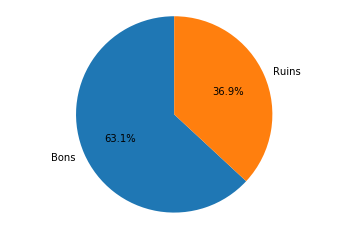

In [31]:
import matplotlib.pyplot as plt

labels = 'Bons', 'Ruins'
sizes = [dad_bom.shape[0], dad_rui.shape[0]]
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
       startangle=90)

ax1.axis('equal')
plt.show()